<a href="https://colab.research.google.com/github/dandamudi-geeta/Reinforcement-Learning/blob/main/2348512_RL(Lab_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

In [32]:
class GridWorld:
    """
    Simple 1D grid world with 5 states.
    The agent can move left (-1) or right (+1).
    Rewards:
    - Goal state (5): +1 reward
    - Start state (1): 0 reward
    - Other states: 0 reward
    """
    def __init__(self):
        self.states = [1, 2, 3, 4, 5]
        self.start_state = 1
        self.goal_state = 5
        self.current_state = self.start_state

    def reset(self):
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        """
        Takes an action and updates the state.
        Args:
            action (int): -1 (left) or +1 (right)
        Returns:
            next_state (int): The updated state.
            reward (float): Reward received.
            done (bool): Whether the episode is complete.
        """
        if action not in [-1, 1]:
            raise ValueError("Invalid action. Choose -1 (left) or +1 (right).")

        # Update state
        self.current_state += action
        self.current_state = max(self.states[0], min(self.current_state, self.states[-1]))

        # Check if the agent reached the goal state
        if self.current_state == self.goal_state:
            return self.current_state, 1, True
        else:
            return self.current_state, 0, False

In [33]:
# TD(0) Algorithm
def td_zero(env, alpha=0.1, gamma=0.9, episodes=100):
    """
    Temporal Difference (TD) 0 Algorithm.
    Args:
        env (GridWorld): The environment.
        alpha (float): Learning rate.
        gamma (float): Discount factor.
        episodes (int): Number of episodes to train.

    Returns:
        V (dict): The value function for all states.
    """

In [34]:
# Instantiate the environment
env = GridWorld()

In [35]:
episodes = 500
alpha = 0.1
gamma = 0.9

In [37]:
# TD(0) Algorithm
def td_zero(env, alpha=0.1, gamma=0.9, episodes=100):
    """
    Temporal Difference (TD) 0 Algorithm.
    Args:
        env (GridWorld): The environment.
        alpha (float): Learning rate.
        gamma (float): Discount factor.
        episodes (int): Number of episodes to train.

    Returns:
        V (dict): The value function for all states.
    """
    # Initialize the value function for each state
    V = {state: 0.0 for state in env.states}

    for episode in range(episodes):  # Ensure `episodes` is passed correctly
        state = env.reset()
        done = False

        while not done:
            # Choose a random action
            action = random.choice([-1, 1])

            # Take a step in the environment
            next_state, reward, done = env.step(action)

            # Update the value function using TD(0)
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            # Move to the next state
            state = next_state

    return V

In [38]:
# Run the TD(0) algorithm
value_function = td_zero(env, alpha=0.1, gamma=0.9, episodes=500)

In [39]:
# Display the results
print("Value Function:")
for state, value in value_function.items():
    print(f"State {state}: {value:.2f}")

Value Function:
State 1: 0.31
State 2: 0.38
State 3: 0.54
State 4: 0.76
State 5: 0.00


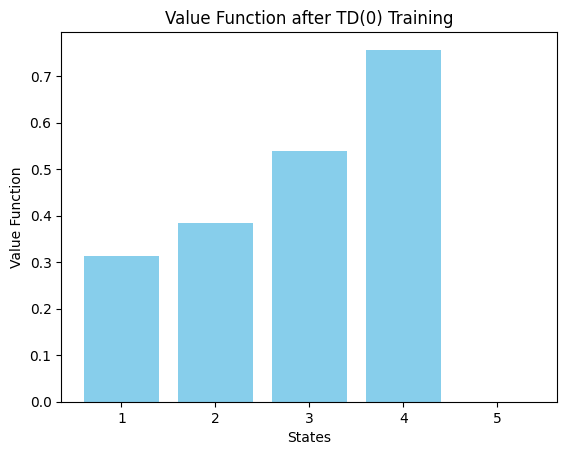

In [40]:
import matplotlib.pyplot as plt

states = list(value_function.keys())
values = list(value_function.values())

plt.bar(states, values, color='skyblue')
plt.xlabel("States")
plt.ylabel("Value Function")
plt.title("Value Function after TD(0) Training")
plt.show()
